In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

In [2]:
tw = pd. read_csv('/content/drive/MyDrive/Twitter_Data.csv')


tw.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
# Download the necessary NLTK data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
tw.dropna(subset=['clean_text', 'category'], inplace=True)

In [6]:
# Extract features and labels
X = tw['clean_text']
y = tw['category']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english', max_features=5000)

In [9]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MultinomialNB()

In [10]:
y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.86      0.43      0.57      7152
         0.0       0.79      0.63      0.70     11067
         1.0       0.64      0.89      0.74     14375

    accuracy                           0.70     32594
   macro avg       0.76      0.65      0.67     32594
weighted avg       0.74      0.70      0.69     32594



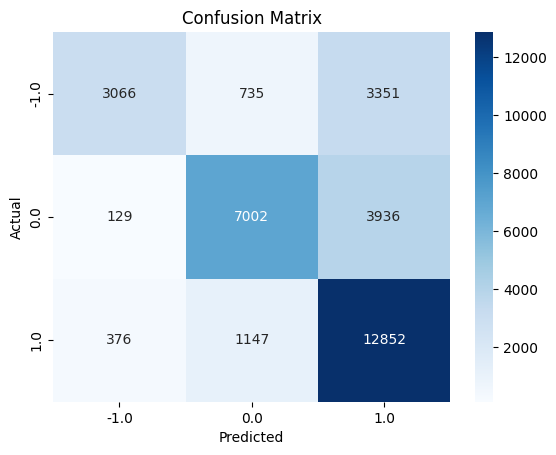

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

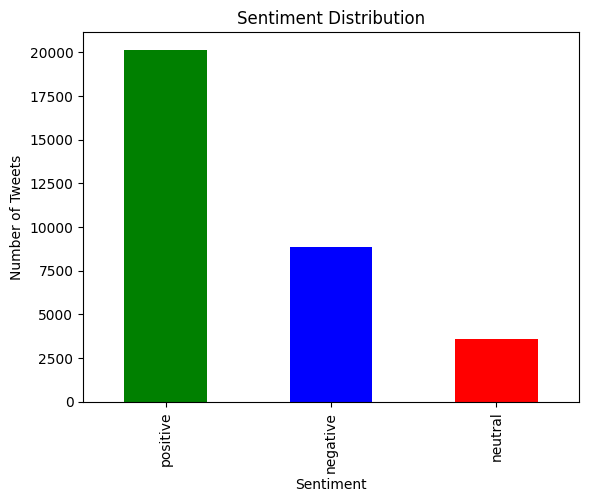

In [19]:
sentiment_counts = pd.Series(y_pred).value_counts()
sentiment_colors = {
    'positive': 'green',
    'negative': 'blue',
    'neutral': 'red'
}
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
sentiment_counts = sentiment_counts.reindex(['positive', 'negative', 'neutral'])
sentiment_counts.plot(kind='bar', color=[sentiment_colors[sentiment] for sentiment in sentiment_counts.index])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution')
plt.show()